# Repetition metric exploration

Notebook for doing some EDA on metrics

In [6]:
INPUT_DIR = "/cmlscratch/manlis/test/watermarking-root/input"
OUTPUT_DIR = "/cmlscratch/manlis/test/watermarking-root/output"

In [7]:
# Basic imports
import os

from tqdm import tqdm
from statistics import mean

import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

import cmasher as cmr

In [8]:
from datasets import load_from_disk

### Load the processed dataset/frame

In [9]:
# save_name = "analysis_ds_1-21_greedy_redo" 
# save_name = "analysis_ds_1-21_greedy_redo_truncated_sanity_check"
# save_name = "analysis_ds_1-23_greedy_gamma_0-25_truncated" 
# save_name = "analysis_ds_1-23_greedy_gamma_0-25_0-5_truncated" # in figure (not 100% sure this is correct, check)

# save_name = "analysis_ds_1-20_more_attack" # in figure

save_name = "analysis_ds_1-19_realnews_1-3_v1" # in figure
# save_name = "analysis_ds_1-23_en_1-3"
# save_name = "analysis_ds_1-23_pile_1-3"

save_dir = f"{INPUT_DIR}/processed_datasets/{save_name}"

In [10]:
raw_data = load_from_disk(save_dir)

#### convert to pandas df

In [11]:
df = raw_data.to_pandas()

In [12]:
print(f"Orig number of rows: {len(df)}")
df.tail()

Orig number of rows: 66194


,idx,truncated_input,baseline_completion,orig_sample_length,prompt_length,real_completion_length,no_bl_gen_time,w_bl_gen_time,spike_entropies,no_bl_output,...,w_bl_num_toks_gend_eq_0,w_bl_whitelist_fraction,w_bl_blacklist_fraction,w_bl_hit_list,avg_spike_entropy,w_bl_exp_num_wl_tokens,w_bl_var_num_wl_tokens,exp_wl_coef,w_bl_exp_whitelist_fraction,w_bl_var_whitelist_fraction
66189,1629,"The cast of the 90s TV show, Hip Hip Hurray, j...",ed the picture post as: Nostalgia#at its best....,319,119,200,2.813786,0.767504,"[[0.10299381613731384, 0.3138567805290222, 0.2...","ed the post, ""No cast ever.... (sic).""\nHere's...",...,False,1.0,0.0,"[False, False, False, False, False, False, Fal...",0.505296,26.275373,12.998542,1.0,0.505296,0.249972
66190,1631,"Seated left to right are Viktor Averin, Sergei...","""arguably the mightiest organised crime group...",1130,930,200,3.019276,1.591323,"[[0.39239728450775146, 0.6695157289505005, 0.3...","""the largest and most powerful mafia organisa...",...,False,1.0,0.0,"[False, False, False, False, False, False, Fal...",0.531480,49.959114,23.406847,1.0,0.531480,0.249009
66191,1632,Does Age Predict Technology Adoption?\nA commo...,"than bound paper, ink and glue to younger or ...",886,686,200,1.283562,3.061106,"[[0.11953060328960419, 0.625767171382904, 0.38...",than that of a traditional print copy. In som...,...,False,1.0,0.0,"[False, False, False, False, False, False, Fal...",0.213594,42.718895,33.594375,1.0,0.213594,0.167972
66192,1633,CES attendees inspect Intel UltraBooks at the ...,appease the growing number of employees who a...,1219,1019,200,3.045814,0.448559,"[[0.9118322134017944, 0.8717396259307861, 0.69...",keep a laptop in the office and another in th...,...,False,1.0,0.0,"[False, False, False, False, False, False, Fal...",0.622416,8.713821,3.290201,1.0,0.622416,0.235014
66193,1635,"Washington, Mar. 9 - Israel is the only safe p...","a wave of church destructions and in Iran, co...",523,323,200,2.861036,2.960533,"[[0.693812370300293, 0.6877695322036743, 0.826...","a surge in violence against Christians, espec...",...,False,1.0,0.0,"[False, False, False, False, False, False, Fal...",0.243750,48.749969,36.867172,1.0,0.243750,0.184336


In [13]:
df.columns

Index(['idx', 'truncated_input', 'baseline_completion', 'orig_sample_length',
       'prompt_length', 'real_completion_length', 'no_bl_gen_time',
       'w_bl_gen_time', 'spike_entropies', 'no_bl_output', 'w_bl_output',
       'no_bl_num_tokens_generated', 'w_bl_num_tokens_generated',
       'no_bl_sec_per_tok', 'no_bl_tok_per_sec', 'w_bl_sec_per_tok',
       'w_bl_tok_per_sec', 'baseline_loss', 'baseline_ppl', 'no_bl_loss',
       'no_bl_ppl', 'w_bl_loss', 'w_bl_ppl', 'model_name', 'dataset_name',
       'dataset_config_name', 'shuffle_dataset', 'shuffle_seed',
       'shuffle_buffer_size', 'max_new_tokens', 'min_prompt_tokens',
       'limit_indices', 'input_truncation_strategy',
       'input_filtering_strategy', 'output_filtering_strategy', 'initial_seed',
       'dynamic_seed', 'bl_proportion', 'bl_logit_bias', 'bl_type',
       'num_beams', 'no_repeat_ngram_size', 'early_stopping',
       'oracle_model_name', 'no_wandb', 'wandb_project', 'wandb_entity',
       'run_name', 'output

## mega filter block

In [14]:
# drop retok_problematic_rows
retok_problematic_rows = df[(df['w_bl_whitelist_fraction'] != -1.0) & (df['w_bl_whitelist_fraction'] != 1.0) & (df['bl_type'] == 'hard')]
print(f"Num rows that are hard-blacklisted, and measureable, but still have a non-100% WL fraction: {len(retok_problematic_rows)} out of {len(df[df['bl_type'] == 'hard'])}")

# drop special rows marked as -1.0
orig_len = len(df)

# df['no_bl_whitelist_fraction'].mask(df['no_bl_whitelist_fraction'] == -1.0, pd.NA, inplace=True)
# df['w_bl_whitelist_fraction'].mask(df['w_bl_whitelist_fraction'] == -1.0, pd.NA, inplace=True)

df = df[df["no_bl_whitelist_fraction"] != -1.0]
df = df[df["w_bl_whitelist_fraction"] != -1.0]

print(f"Dropped {orig_len-len(df)} rows, new len {len(df)}")

# drop too few tokesn rows

orig_len = len(df)
# df = df[df["no_bl_ppl"].isna()]
# df = df[df["w_bl_ppl"].isna()]
df = df[~(df["no_bl_ppl"].isna() | df["w_bl_ppl"].isna())]
print(f"Dropped {orig_len-len(df)} rows, new len {len(df)}")

# drop huge biases
orig_len = len(df)

df = df[df["bl_logit_bias"] <= 100.0]

print(f"Dropped {orig_len-len(df)} rows, new len {len(df)}")

orig_len = len(df)

# df = df[df["bl_hparams"].apply(lambda tup: (tup[0] == False and tup[2] != 1) or (tup[0] == True and tup[2] == 1) or (tup[0] == False))]
df = df[((df["use_sampling"]==True) & (df["num_beams"] == 1)) | (df["use_sampling"]==False)]

print(f"Dropped {orig_len-len(df)} rows, new len {len(df)}")

# correct sampling temp
df.loc[df["use_sampling"]==False,"sampling_temp"] = df.loc[df["use_sampling"]==False,"sampling_temp"].fillna(0.0)
df.loc[df["use_sampling"]==True,"sampling_temp"] = df.loc[df["use_sampling"]==True,"sampling_temp"].fillna(1.0)

# set to inf for hard blacklist
df.loc[df["bl_type"]=="hard","bl_logit_bias"] = np.inf
# df.loc[df["bl_type"]=="hard","bl_logit_bias"] = 10000 # crosscheck with whats hardcoded in the bl processor

# rename some stuff
df["delta"] = df["bl_logit_bias"].values
df["gamma"] = 1 - df["bl_proportion"].values
df["gamma"] = df["gamma"].round(3)

df["no_bl_act_num_wl_tokens"] = np.round(df["no_bl_whitelist_fraction"].values*df["no_bl_num_tokens_generated"],1) # round to 1 for sanity
df["w_bl_act_num_wl_tokens"] = np.round(df["w_bl_whitelist_fraction"].values*df["w_bl_num_tokens_generated"],1) # round to 1 for sanity

df["w_bl_std_num_wl_tokens"] = np.sqrt(df["w_bl_var_num_wl_tokens"].values)

if "real_completion_length":
    df["baseline_num_tokens_generated"] = df["real_completion_length"].values

if "actual_attacked_ratio" in df.columns:
    df["actual_attacked_fraction"] = df["actual_attacked_ratio"].values*df["replace_ratio"].values

if "meta" in df.columns:
    df["pile_set_name"] = df["meta"].apply(lambda dict: dict["pile_set_name"])

df["baseline_hit_list_length"] = df["baseline_hit_list"].apply(len)
df["no_bl_hit_list_length"] = df["no_bl_hit_list"].apply(len)
df["w_bl_hit_list_length"] = df["w_bl_hit_list"].apply(len)


# for pile outlier filtering
df["w_bl_space_count"] = df["w_bl_output"].apply(lambda string: string.count(" "))
df["no_bl_space_count"] = df["no_bl_output"].apply(lambda string: string.count(" "))
df["baseline_space_count"] = df["baseline_completion"].apply(lambda string: string.count(" "))

df["w_bl_space_frac"] = df["w_bl_space_count"].values / df["w_bl_hit_list_length"]
df["no_bl_space_frac"] = df["no_bl_space_count"].values / df["no_bl_hit_list_length"]
df["baseline_space_frac"] = df["baseline_space_count"].values / df["baseline_hit_list_length"]


# Final length filtering 

orig_len = len(df)

# # main filters
# # df = df[(df["real_completion_length"] == 200) & (df["w_bl_num_tokens_generated"] == 200)]
# df = df[(df["gamma"] == 0.1) | (df["gamma"] == 0.25) | (df["gamma"] == 0.5)]
# df = df[(df["delta"] == 1.0) | (df["delta"] == 2.0) | (df["delta"] == 10.0)]
# df = df[(df["use_sampling"] == True)]
# df = df[(df["bl_type"] == "soft")]

# df = df[(df["real_completion_length"] == 200) & (df["no_bl_num_tokens_generated"] == 200) & (df["w_bl_num_tokens_generated"] == 200)] # now also applies to the truncated version
# df = df[(df["no_bl_num_tokens_generated"] >= 500) & (df["w_bl_num_tokens_generated"] >= 500)] # all gas noop

# # # attack specific
# df = df[(df["real_completion_length"] == 200) & (df["no_bl_num_tokens_generated"] == 200) & (df["w_bl_num_tokens_generated"] == 200)]
# df = df[(df["replace_ratio"] <= 0.7)]

# # NOTE pile only
# df = df[df["w_bl_space_frac"] <= 0.9]
# df = df[df["no_bl_space_frac"] <= 0.9]
# df = df[df["pile_set_name"] != "Github"]

upper_T = 205
lower_T = 195
df = df[(df["baseline_hit_list_length"] >= lower_T) & (df["no_bl_hit_list_length"] >= lower_T) & (df["w_bl_hit_list_length"] >= lower_T)] # now also applies to the truncated version
df = df[(df["baseline_hit_list_length"] <= upper_T) & (df["no_bl_hit_list_length"] <= upper_T) & (df["w_bl_hit_list_length"] <= upper_T)] # now also applies to the truncated version


print(f"Dropped {orig_len-len(df)} rows, new len {len(df)}")

Num rows that are hard-blacklisted, and measureable, but still have a non-100% WL fraction: 0 out of 0
Dropped 721 rows, new len 65473
Dropped 0 rows, new len 65473
Dropped 0 rows, new len 65473
Dropped 0 rows, new len 65473
Dropped 37334 rows, new len 28139


# Add z-scores

In [15]:
from math import sqrt
import scipy.stats
def compute_z_score(observed_wl_frac, T, gamma):
    numer = observed_wl_frac - gamma
    denom = sqrt(gamma*(1-gamma)/T)
    z = numer/denom
    return z

def compute_wl_for_z(z, T, gamma):
    denom = sqrt(gamma*(1-gamma)/T)
    numer = ((z*denom)+gamma)*T
    return numer

def compute_p_value(z):
    p_value = scipy.stats.norm.sf(z)
    return p_value

df["baseline_z_score"] = df[["baseline_whitelist_fraction", "baseline_num_tokens_generated", "gamma"]].apply(lambda tup: compute_z_score(*tup), axis=1)
df["no_bl_z_score"] = df[["no_bl_whitelist_fraction", "no_bl_num_tokens_generated", "gamma"]].apply(lambda tup: compute_z_score(*tup), axis=1)
df["w_bl_z_score"] = df[["w_bl_whitelist_fraction", "w_bl_num_tokens_generated", "gamma"]].apply(lambda tup: compute_z_score(*tup), axis=1)

if "w_bl_attacked_whitelist_fraction" in df.columns:
    df["w_bl_attacked_z_score"] = df[["w_bl_attacked_whitelist_fraction", "w_bl_attacked_num_tokens_generated", "gamma"]].apply(lambda tup: compute_z_score(*tup), axis=1)

In [16]:
# if attacked in df
if "w_bl_attacked_whitelist_fraction" in df.columns:
    df["w_bl_attacked_act_num_wl_tokens"] = np.round(df["w_bl_attacked_whitelist_fraction"].values*df["w_bl_attacked_num_tokens_generated"],1) # round to 1 for sanity

    df["w_bl_attacked_z_score"] = df[["w_bl_attacked_whitelist_fraction", "w_bl_attacked_num_tokens_generated", "gamma"]].apply(lambda tup: compute_z_score(*tup), axis=1)

    df[["bl_proportion","w_bl_attacked_whitelist_fraction", "w_bl_attacked_num_tokens_generated","w_bl_attacked_act_num_wl_tokens", "w_bl_attacked_z_score"]]

# Groupby (decide which hyperparameters to groups the rows by)

In [17]:
if "w_bl_attacked_whitelist_fraction" in df.columns: 
    groupby_fields = ['use_sampling','num_beams','gamma','delta', 'replace_ratio'] # attack grouping
else:
    groupby_fields = ['use_sampling','num_beams','delta','gamma'] # regular grouping

In [18]:
grouped_df = df.groupby(groupby_fields)

In [19]:
print(f"Number of rows after filtering: {len(df)}")
print(f"Number of groups: {len(grouped_df)}")

Number of rows after filtering: 28139
Number of groups: 56


In [20]:
grouped_df["w_bl_z_score"].describe()

count       mean       std        min  \
use_sampling num_beams delta gamma                                          
False        1         0.1   0.50   497.0   0.775204  2.517472  -6.788225   
                       0.5   0.50   496.0   2.905542  2.515852  -5.798276   
                       1.0   0.50   497.0   5.407189  2.606488  -3.394113   
                       2.0   0.50   495.0   8.785251  2.422845  -1.555635   
                       5.0   0.50   495.0  12.431525  1.582604   0.848528   
                       10.0  0.50   491.0  13.988974  0.397100  10.748023   
                       50.0  0.50   488.0  14.076854  0.333189  10.748023   
             4         0.1   0.50   500.0   1.225231  1.931048  -5.091169   
                       0.5   0.50   504.0   4.121540  1.785928  -2.545584   
                       1.0   0.50   506.0   7.248399  1.827018   1.838478   
                       2.0   0.50   504.0  11.145401  1.429662   3.252691   
                       5.0   0.50   507.0  13.921719  0.441143   8.909545   
                       10.0  0.50   505.0  14.112293  0.129659  12.586501   
                       50.0  0.50   508.0  14.117756  0.123950  12.586501   
             8         0.1   0.50   501.0   1.194271  1.867354  -5.232590   
                       0.5   0.50   503.0   4.403488  1.913617  -2.687006   
                       1.0   0.50   501.0   7.862284  1.909225   1.414214   
                       2.0   0.50   502.0  11.743655  1.245523   3.959798   
                       5.0   0.50   498.0  14.048135  0.184397  12.162237   
                       10.0  0.50   500.0  14.118455  0.145913  11.879394   
                       50.0  0.50   502.0  14.120095  0.144250  11.879394   
True         1         0.1   0.10   507.0   0.794085  1.477187  -4.477159   
                             0.25   510.0   0.174547  1.231675  -3.265986   
                             0.50   504.0   0.785959  1.331575  -3.676955   
                             0.75   506.0   0.769141  1.216546  -6.858571   
                             0.90   505.0   0.426764  1.078141  -3.064129   
                       0.5   0.10   502.0   2.190078  1.583207  -2.357023   
                             0.25   503.0   2.067980  1.321680  -1.796292   
                             0.50   503.0   2.769410  1.401529 -12.020815   
                             0.75   504.0   2.258562  1.120684  -3.265986   
                             0.90   515.0   1.352280  1.087089  -4.949747   
                       1.0   0.10   506.0   4.505423  1.912686  -3.535534   
                             0.25   506.0   4.788918  1.523620  -0.653197   
                             0.50   506.0   4.899046  1.496086  -1.272792   
                             0.75   504.0   3.794776  1.005397  -0.326599   
                             0.90   501.0   2.187248  0.995490  -3.771236   
                       2.0   0.10   507.0  11.266219  2.745536   1.649916   
                             0.25   505.0  10.669313  2.263002  -1.143095   
                             0.50   507.0   8.520831  1.498280  -1.131371   
                             0.75   505.0   5.494584  1.076413  -1.469694   
                             0.90   505.0   3.283954  0.826203  -2.357023   
                       5.0   0.10   501.0  33.031715  4.074784  20.270394   
                             0.25   503.0  21.247814  1.998682   4.536092   
                             0.50   504.0  12.566653  1.241437   2.828427   
                             0.75   502.0   7.432600  0.752119   0.163299   
                             0.90   501.0   4.275912  0.514057  -0.235702   
                       10.0  0.10   490.0  41.556418  1.800056  19.327585   
                             0.25   499.0  24.166544  0.884251   7.838367   
                             0.50   507.0  13.973804  0.251381  12.162237   
                             0.75   504.0   8.079043  0.183141   6.531973   
                             0.9

### new metrics

In [21]:
# from https://github.com/yxuansu/SimCTG/blob/main/simctg/evaluation.py
# as used in Contrastive Decoding paper

def eval_text(text, ngram):
    token_list = text.strip().split()
    start_idx, end_idx = 0, ngram
    total_num = 0
    ngram_set = set()
    while end_idx < len(token_list):
        one_ngram_list = token_list[start_idx:end_idx]
        assert len(one_ngram_list) == ngram
        one_ngram = ' '.join(one_ngram_list)
        total_num += 1
        ngram_set.add(one_ngram)
        start_idx += 1
        end_idx += 1
    return len(ngram_set), total_num

def eval_one_instance(text, ngram_list):
    res_dict = {}
    for n in ngram_list:
        n_unique, n_total = eval_text(text, n)
        res_dict[n] = {'unique':n_unique, 'total':n_total}
    unique_token_set = set(text.strip().split())
    return res_dict, unique_token_set

def measure_repetition_and_diversity(text_list):
    '''
        text_list: the list of text
    '''
    ngram_list = [2,3,4]
    pred_res_dict = {}
    for n in ngram_list:
        pred_res_dict[n] = {}
        pred_res_dict[n]['unique'] = 0
        pred_res_dict[n]['total'] = 0
    
    pred_unique_token_set = set()
    for text in text_list:
        text = text.strip('\n').strip()
        one_pred_res_dict, one_pred_uni_token_set = eval_one_instance(text, ngram_list)

        # unique token set
        pred_unique_token_set = pred_unique_token_set.union(one_pred_uni_token_set)
        # ngram statistic
        for n in ngram_list:
            pred_res_dict[n]['unique'] += one_pred_res_dict[n]['unique']
            pred_res_dict[n]['total'] += one_pred_res_dict[n]['total']

    # prediction result
    pred_seq_2 = 1 - (pred_res_dict[2]['unique']/pred_res_dict[2]['total'])
    pred_seq_2 = round(pred_seq_2 * 100, 2)
    pred_seq_3 = 1 - (pred_res_dict[3]['unique']/pred_res_dict[3]['total'])
    pred_seq_3 = round(pred_seq_3 * 100, 2)
    pred_seq_4 = 1 - (pred_res_dict[4]['unique']/pred_res_dict[4]['total'])
    pred_seq_4 = round(pred_seq_4 * 100, 2)
    pred_div = (1 - pred_seq_2/100) * (1 - pred_seq_3/100) * (1 - pred_seq_4/100)
    return pred_seq_2, pred_seq_3, pred_seq_4, pred_div

In [22]:
group = (True, 1, 2.0, 0.5)
# group = (False, 1, 2.0, 0.5)

group_df = grouped_df.get_group(group)

# group = (True, 1, 1.0, 0.5)

# group_df = pd.concat([group_df, grouped_df.get_group(group)],axis=0)

# len(group_df)

In [23]:
measure_repetition_and_diversity(group_df["baseline_completion"].values.tolist())

(3.57, 1.07, 0.54, 0.9488304872540001)

In [24]:
measure_repetition_and_diversity(group_df["no_bl_output"].values.tolist())

(10.7, 5.26, 3.51, 0.81633261018)

In [25]:
measure_repetition_and_diversity(group_df["w_bl_output"].values.tolist())

(13.39, 8.05, 6.08, 0.7479591098399999)

In [26]:
# Sampling
group_list =(
    (True, 1, 2.0, 0.9),
    (True, 1, 2.0, 0.75),
    (True, 1, 2.0, 0.5),
    (True, 1, 2.0, 0.25),
    (True, 1, 2.0, 0.1),

    (True, 1, 0.1, 0.5),
    (True, 1, 0.5, 0.5),
    (True, 1, 1.0, 0.5),
    (True, 1, 2.0, 0.5),
    (True, 1, 5.0, 0.5),
)

# # Greedy
# group_list =(
#     (False, 1, 0.1, 0.5),
#     (False, 1, 0.5, 0.5),
#     (False, 1, 1.0, 0.5),
#     (False, 1, 2.0, 0.5),
#     (False, 1, 5.0, 0.5),

#     (False, 4, 0.1, 0.5),
#     (False, 4, 0.5, 0.5),
#     (False, 4, 1.0, 0.5),
#     (False, 4, 2.0, 0.5),
#     (False, 4, 5.0, 0.5),

#     (False, 8, 0.1, 0.5),
#     (False, 8, 0.5, 0.5),
#     (False, 8, 1.0, 0.5),
#     (False, 8, 2.0, 0.5),
#     (False, 8, 5.0, 0.5),
# )

sampling, beams, gammas, deltas = [], [], [], []
baseline_diversities = []
no_watermark_diversities = []
watermark_diversities = []

for idx, group in enumerate(group_list):
    group_df = grouped_df.get_group(group)

    sampling.append(group[0])
    beams.append(group[1])
    deltas.append(group[2])
    gammas.append(group[3])
    baseline_diversities.append(measure_repetition_and_diversity(group_df["baseline_completion"].values.tolist()))
    no_watermark_diversities.append(measure_repetition_and_diversity(group_df["no_bl_output"].values.tolist()))
    watermark_diversities.append(measure_repetition_and_diversity(group_df["w_bl_output"].values.tolist()))

viz_df = pd.DataFrame()

viz_df["sampling"] = sampling
viz_df["beams"] = beams
viz_df["gammas"] = gammas
viz_df["deltas"] = deltas
viz_df["baseline_diversities"] = baseline_diversities
viz_df["no_watermark_diversities"] = no_watermark_diversities
viz_df["watermark_diversities"] = watermark_diversities

viz_df["baseline_2gram_repetition"] = [x[0] for x in viz_df["baseline_diversities"]]
viz_df["baseline_3gram_repetition"] = [x[1] for x in viz_df["baseline_diversities"]]
viz_df["baseline_4gram_repetition"] = [x[2] for x in viz_df["baseline_diversities"]]
viz_df["baseline_diversity"] = [x[3] for x in viz_df["baseline_diversities"]]

viz_df["no_watermark_2gram_repetition"] = [x[0] for x in viz_df["no_watermark_diversities"]]
viz_df["no_watermark_3gram_repetition"] = [x[1] for x in viz_df["no_watermark_diversities"]]
viz_df["no_watermark_4gram_repetition"] = [x[2] for x in viz_df["no_watermark_diversities"]]
viz_df["no_watermark_diversity"] = [x[3] for x in viz_df["no_watermark_diversities"]]

viz_df["watermark_2gram_repetition"] = [x[0] for x in viz_df["watermark_diversities"]]
viz_df["watermark_3gram_repetition"] = [x[1] for x in viz_df["watermark_diversities"]]
viz_df["watermark_4gram_repetition"] = [x[2] for x in viz_df["watermark_diversities"]]
viz_df["watermark_diversity"] = [x[3] for x in viz_df["watermark_diversities"]]

viz_df = viz_df.drop(columns=["baseline_diversities", "no_watermark_diversities", "watermark_diversities"])

In [27]:
viz_df

,sampling,beams,gammas,deltas,baseline_2gram_repetition,baseline_3gram_repetition,baseline_4gram_repetition,baseline_diversity,no_watermark_2gram_repetition,no_watermark_3gram_repetition,no_watermark_4gram_repetition,no_watermark_diversity,watermark_2gram_repetition,watermark_3gram_repetition,watermark_4gram_repetition,watermark_diversity
0,True,1,0.90,2.0,3.76,1.10,0.53,0.946769,11.44,5.95,4.09,0.798841,11.25,5.94,4.07,0.800807
1,True,1,0.75,2.0,3.72,1.12,0.54,0.946876,12.02,6.28,4.30,0.789093,11.81,6.49,4.63,0.786483
2,True,1,0.50,2.0,3.57,1.07,0.54,0.948830,10.70,5.26,3.51,0.816333,13.39,8.05,6.08,0.747959
3,True,1,0.25,2.0,3.40,0.87,0.36,0.954148,11.47,5.89,4.03,0.799580,15.26,10.19,8.19,0.698720
4,True,1,0.10,2.0,3.36,0.83,0.37,0.954833,11.41,5.93,4.04,0.799698,16.55,11.10,8.95,0.675473
5,True,1,0.50,0.1,3.53,1.03,0.49,0.950085,11.41,5.92,4.13,0.799033,11.64,6.07,4.17,0.795356
6,True,1,0.50,0.5,3.91,1.23,0.62,0.943197,11.48,5.94,4.02,0.799148,11.86,6.33,4.45,0.788868
7,True,1,0.50,1.0,3.70,1.14,0.56,0.946690,11.04,5.55,3.75,0.808719,11.29,5.87,4.05,0.801209
8,True,1,0.50,2.0,3.57,1.07,0.54,0.948830,10.70,5.26,3.51,0.816333,13.39,8.05,6.08,0.747959
9,True,1,0.50,5.0,3.77,1.16,0.59,0.945526,10.99,5.42,3.57,0.811802,17.06,12.13,10.18,0.654603


#### Sampling data

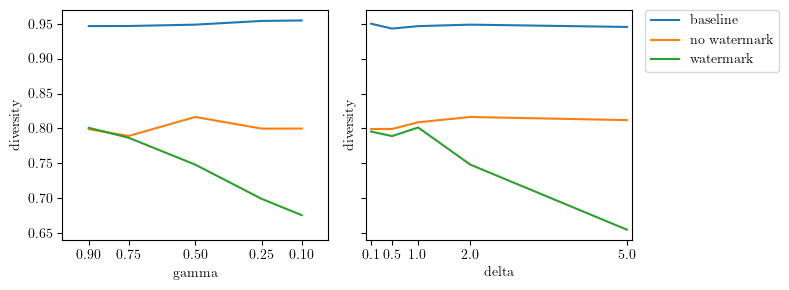

In [28]:
# plot baseline_diversity, no_watermark_diversity, watermark_diversity
# as a function of gammas, deltas in two different charts

baseline_diversities = viz_df["baseline_diversity"].values.tolist()
no_watermark_diversities = viz_df["no_watermark_diversity"].values.tolist()
watermark_diversities = viz_df["watermark_diversity"].values.tolist()
gammas = viz_df["gammas"].values.tolist()
deltas = viz_df["deltas"].values.tolist()

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8,3), sharey=True)

slice_idx = len(baseline_diversities)//2

plt.subplot(1, 2, 1)
plt.plot(gammas[:slice_idx], baseline_diversities[:slice_idx], label="baseline")
plt.plot(gammas[:slice_idx], no_watermark_diversities[:slice_idx], label="no watermark")
plt.plot(gammas[:slice_idx], watermark_diversities[:slice_idx], label="watermark")
plt.xticks(gammas[:slice_idx])
plt.xlim(0, 1)
# reverse x axis
axs[0].invert_xaxis()
plt.xlabel("gamma")
plt.ylabel("diversity")

plt.subplot(1, 2, 2)
plt.plot(deltas[slice_idx:], baseline_diversities[slice_idx:], label="baseline")
plt.plot(deltas[slice_idx:], no_watermark_diversities[slice_idx:], label="no watermark")
plt.plot(deltas[slice_idx:], watermark_diversities[slice_idx:], label="watermark")
plt.xticks(deltas[slice_idx:])
plt.xlim(0, 5.1)
plt.xlabel("delta")
plt.ylabel("diversity")


# legend to right of both charts
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/sampling_diversity.png")

plt.show()

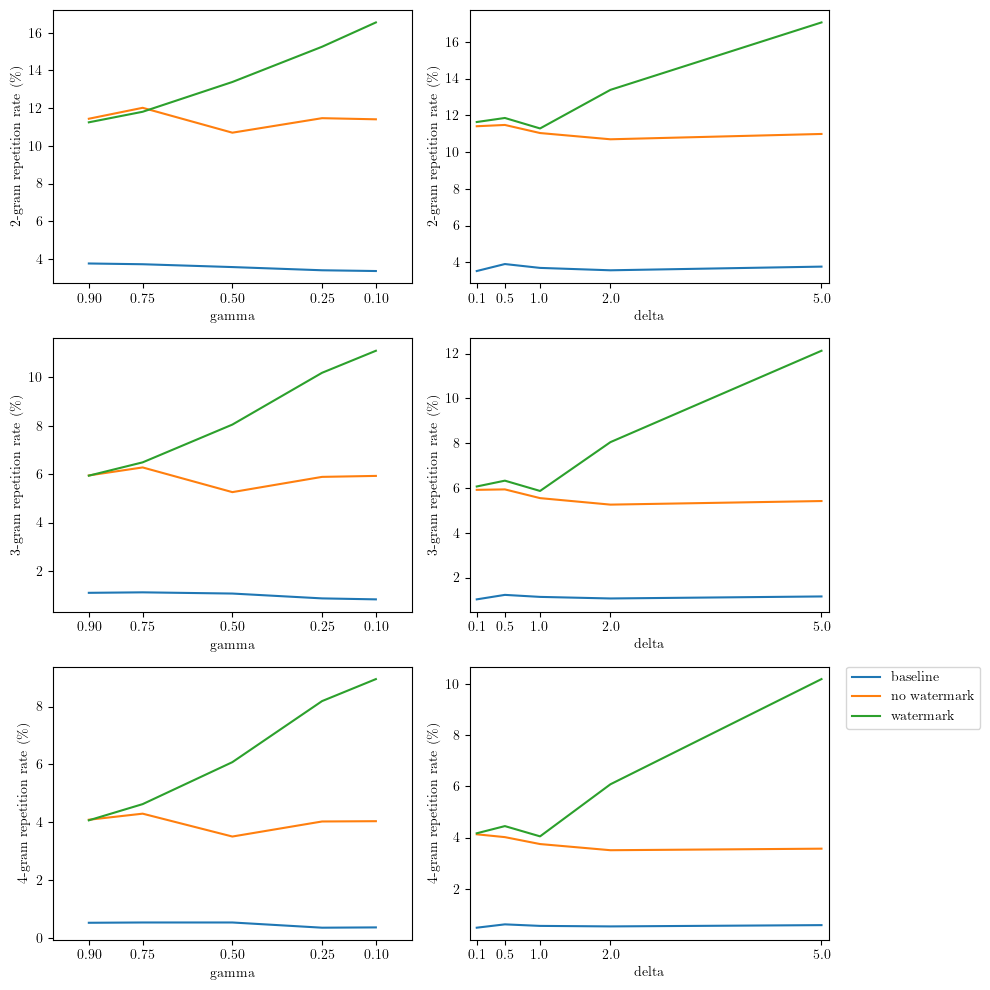

In [29]:
# plot baseline_ngram_repetition, no_watermark_ngram_repetition, watermark_ngram_repetition
# where n is a parameter in subplots in the row dimension
# as a function of gammas, deltas in two different charts

n_list = [2,3,4]

fig, axs = plt.subplots(ncols=2, nrows=len(n_list), figsize=(10,10)) #, sharey=True)

for idx, n in enumerate(n_list):

    baseline_ngram_repetitions = viz_df[f"baseline_{n}gram_repetition"].values.tolist()
    no_watermark_ngram_repetitions = viz_df[f"no_watermark_{n}gram_repetition"].values.tolist()
    watermark_ngram_repetitions = viz_df[f"watermark_{n}gram_repetition"].values.tolist()
    gammas = viz_df["gammas"].values.tolist()
    deltas = viz_df["deltas"].values.tolist()

    slice_idx = len(baseline_ngram_repetitions)//2

    plt.subplot(len(n_list), 2, 2*idx+1)

    plt.plot(gammas[:slice_idx], baseline_ngram_repetitions[:slice_idx], label="baseline")
    plt.plot(gammas[:slice_idx], no_watermark_ngram_repetitions[:slice_idx], label="no watermark")
    plt.plot(gammas[:slice_idx], watermark_ngram_repetitions[:slice_idx], label="watermark")
    plt.xticks(gammas[:slice_idx])
    plt.xlim(0, 1)
    # reverse x axis
    plt.gca().invert_xaxis()
    # plt.ylim(0, 100)
    plt.xlabel("gamma")
    plt.ylabel(f"{n}-gram repetition rate (\%)")

    plt.subplot(len(n_list), 2, 2*idx+2)
    
    plt.plot(deltas[slice_idx:], baseline_ngram_repetitions[slice_idx:], label="baseline")
    plt.plot(deltas[slice_idx:], no_watermark_ngram_repetitions[slice_idx:], label="no watermark")
    plt.plot(deltas[slice_idx:], watermark_ngram_repetitions[slice_idx:], label="watermark")
    plt.xticks(deltas[slice_idx:])
    plt.xlim(0, 5.1)
    # plt.ylim(0, 100)
    plt.xlabel("delta")
    plt.ylabel(f"{n}-gram repetition rate (\%)")

# legend to right of both charts
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# tight layout
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/sampling_ngram.png")

plt.show()


### Greedy data

In [ ]:
# plot baseline_diversity, no_watermark_diversity, watermark_diversity
# as a function of deltas in two different charts, beams == 1 on left , beams == 8 on right

baseline_diversities = viz_df["baseline_diversity"].values.tolist()
no_watermark_diversities = viz_df["no_watermark_diversity"].values.tolist()
watermark_diversities = viz_df["watermark_diversity"].values.tolist()
beams = viz_df["beams"].values.tolist()
deltas = viz_df["deltas"].values.tolist()

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12,3), sharey=True)

slice_idx = len(baseline_diversities)//3

plt.subplot(1, 3, 1)
plt.plot(deltas[:slice_idx], baseline_diversities[:slice_idx], label="baseline")
plt.plot(deltas[:slice_idx], no_watermark_diversities[:slice_idx], label="no watermark")
plt.plot(deltas[:slice_idx], watermark_diversities[:slice_idx], label="watermark")
plt.xticks(deltas[:slice_idx])
plt.xlim(0, 5.1)
plt.title("Number of beams = 1")
plt.xlabel("deltas")
plt.ylabel("diversity")

plt.subplot(1, 3, 2)
plt.plot(deltas[slice_idx:slice_idx*2], baseline_diversities[slice_idx:slice_idx*2], label="baseline")
plt.plot(deltas[slice_idx:slice_idx*2], no_watermark_diversities[slice_idx:slice_idx*2], label="no watermark")
plt.plot(deltas[slice_idx:slice_idx*2], watermark_diversities[slice_idx:slice_idx*2], label="watermark")
plt.xticks(deltas[slice_idx:slice_idx*2])
plt.xlim(0, 5.1)
plt.title("Number of beams = 4")
plt.xlabel("deltas")
plt.ylabel("diversity")

plt.subplot(1, 3, 3)
plt.plot(deltas[slice_idx*2:], baseline_diversities[slice_idx*2:], label="baseline")
plt.plot(deltas[slice_idx*2:], no_watermark_diversities[slice_idx*2:], label="no watermark")
plt.plot(deltas[slice_idx*2:], watermark_diversities[slice_idx*2:], label="watermark")
plt.xticks(deltas[slice_idx*2:])
plt.xlim(0, 5.1)
plt.title("Number of beams = 8")
plt.xlabel("delta")
plt.ylabel("diversity")

# legend to right of both charts
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/beams_diversity.png")

plt.show()



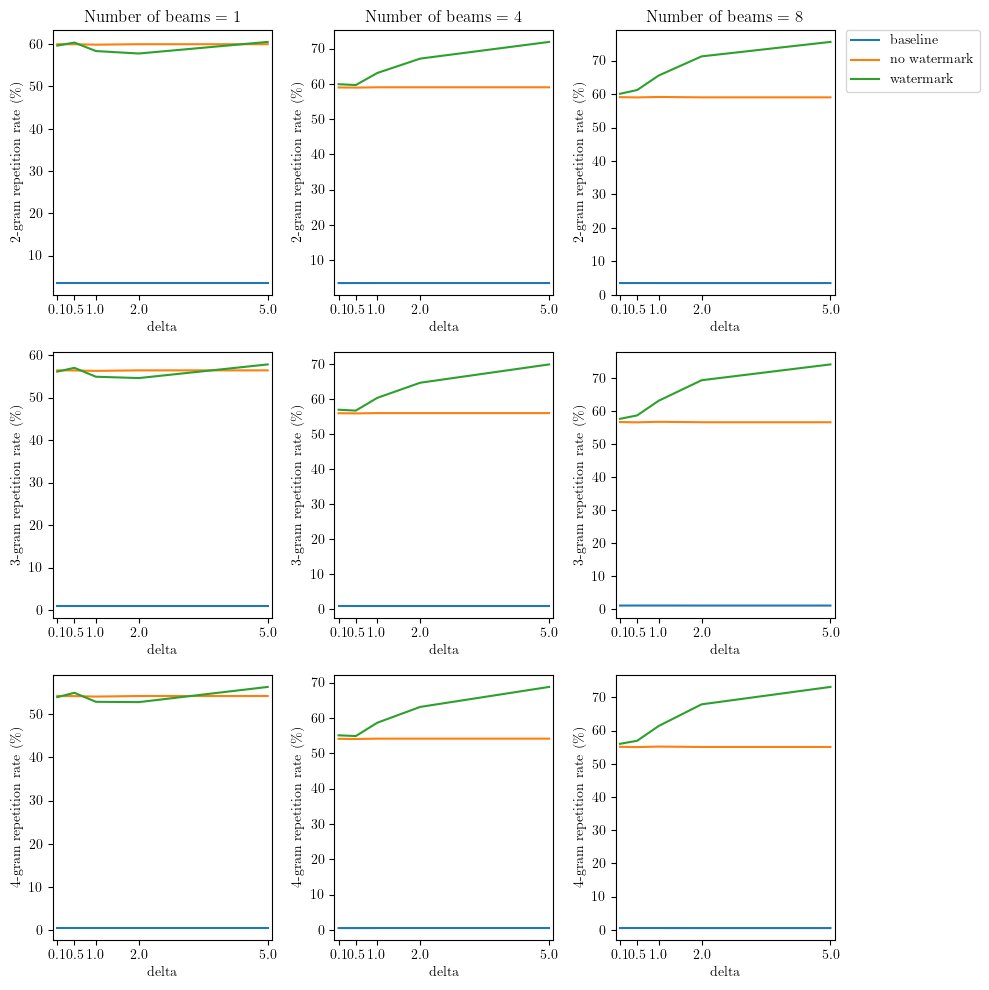

In [22]:
# plot baseline_ngram_repetition, no_watermark_ngram_repetition, watermark_ngram_repetition
# where n is a parameter in subplots in the row dimension
# as a function of gammas, deltas in two different charts

n_list = [2,3,4]

fig, axs = plt.subplots(ncols=3, nrows=len(n_list), figsize=(10,10)) #, sharey=True)

for idx, n in enumerate(n_list):

    baseline_ngram_repetitions = viz_df[f"baseline_{n}gram_repetition"].values.tolist()
    no_watermark_ngram_repetitions = viz_df[f"no_watermark_{n}gram_repetition"].values.tolist()
    watermark_ngram_repetitions = viz_df[f"watermark_{n}gram_repetition"].values.tolist()
    gammas = viz_df["gammas"].values.tolist()
    deltas = viz_df["deltas"].values.tolist()

    slice_idx = len(baseline_ngram_repetitions)//3

    plt.subplot(len(n_list), 3, 3*idx+1)

    plt.plot(deltas[:slice_idx], baseline_ngram_repetitions[:slice_idx], label="baseline")
    plt.plot(deltas[:slice_idx], no_watermark_ngram_repetitions[:slice_idx], label="no watermark")
    plt.plot(deltas[:slice_idx], watermark_ngram_repetitions[:slice_idx], label="watermark")
    plt.xticks(deltas[:slice_idx])
    plt.xlim(0, 5.1)
    # plt.ylim(0, 100)
    if idx == 0: plt.title("Number of beams = 1")
    plt.xlabel("delta")
    plt.ylabel(f"{n}-gram repetition rate (\%)")

    plt.subplot(len(n_list), 3, 3*idx+2)

    plt.plot(deltas[slice_idx:slice_idx*2], baseline_ngram_repetitions[slice_idx:slice_idx*2], label="baseline")
    plt.plot(deltas[slice_idx:slice_idx*2], no_watermark_ngram_repetitions[slice_idx:slice_idx*2], label="no watermark")
    plt.plot(deltas[slice_idx:slice_idx*2], watermark_ngram_repetitions[slice_idx:slice_idx*2], label="watermark")
    plt.xticks(deltas[slice_idx:slice_idx*2])
    plt.xlim(0, 5.1)
    # plt.ylim(0, 100)
    if idx == 0: plt.title("Number of beams = 4")
    plt.xlabel("delta")
    plt.ylabel(f"{n}-gram repetition rate (\%)")

    plt.subplot(len(n_list), 3, 3*idx+3)
    
    plt.plot(deltas[slice_idx*2:], baseline_ngram_repetitions[slice_idx*2:], label="baseline")
    plt.plot(deltas[slice_idx*2:], no_watermark_ngram_repetitions[slice_idx*2:], label="no watermark")
    plt.plot(deltas[slice_idx*2:], watermark_ngram_repetitions[slice_idx*2:], label="watermark")
    plt.xticks(deltas[slice_idx*2:])
    plt.xlim(0, 5.1)
    # plt.ylim(0, 100)
    if idx == 0: plt.title("Number of beams = 8")
    plt.xlabel("delta")
    plt.ylabel(f"{n}-gram repetition rate (\%)")
    if idx == 0: plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/beams_ngram.png")

plt.show()
